<a href="https://colab.research.google.com/github/RONIN-plays/CodeAlpha_HandwrittenCharacterRecognition/blob/main/CodeAlpha_HandwrittenCharacterRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)  Test shape: (10000, 28, 28)


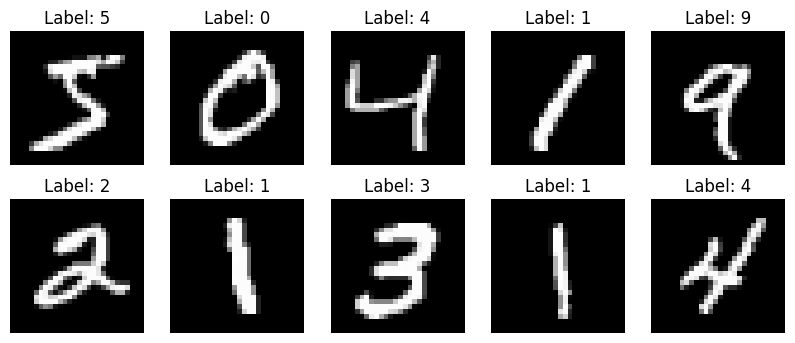

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

# Quick look at some samples
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [3]:
# Normalize
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Reshape to (samples, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


building the CNN model


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')   # 10 digits
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=5,                # can increase to 10 for better accuracy
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.8216 - loss: 0.5829 - val_accuracy: 0.9810 - val_loss: 0.0608
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.9762 - loss: 0.0796 - val_accuracy: 0.9858 - val_loss: 0.0457
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9890 - val_loss: 0.0369
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.9852 - loss: 0.0462 - val_accuracy: 0.9883 - val_loss: 0.0372
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9889 - loss: 0.0349 - val_accuracy: 0.9907 - val_loss: 0.0331


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc*100, 2), "%")


Test Accuracy: 98.97 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


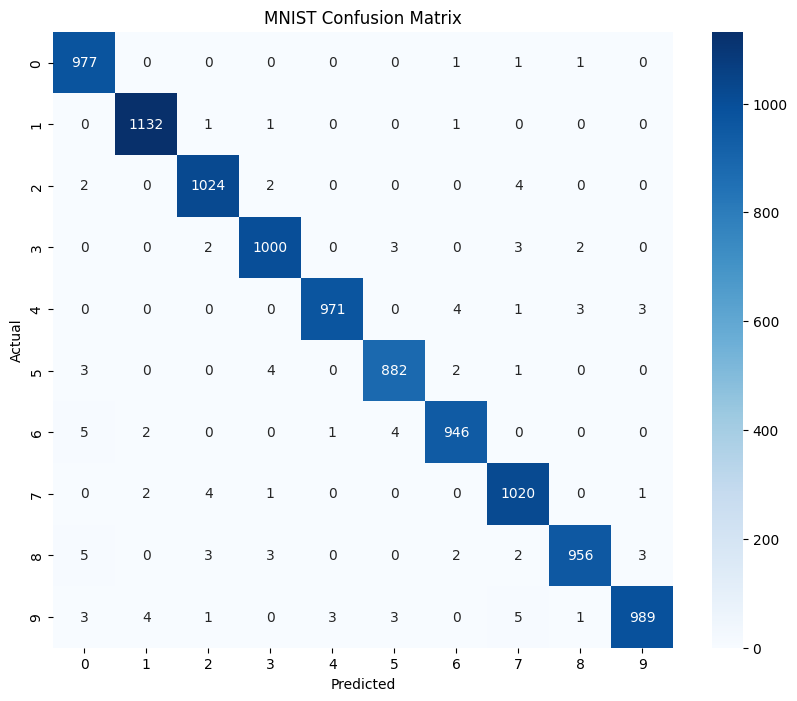

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MNIST Confusion Matrix")
plt.show()
